In [29]:
import os

current_direction = os.getcwd()
print(current_direction)

c:\Users\user\Desktop\python\kaggle\playground-series-s4e5\preprocessing_code


# import library

In [30]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# load data

In [31]:
train = pd.read_csv('../data/train.csv', encoding = 'utf-8')
test = pd.read_csv('../data/test.csv', encoding = 'utf-8')

train = pd.DataFrame(train)
test = pd.DataFrame(test)

train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [32]:
print(train.columns)
print(train.shape)

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')
(1117957, 22)


# data check

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [34]:
train.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [35]:
# 히스토그램으로 데이터의 분포 확인

# for column in train.columns:
#     plt.figure()
#     plt.hist(train[column], bins = 30, color = 'pink', edgecolor = 'black')
#     plt.title(f"histogram of {column}")
#     plt.xlabel("value")
#     plt.ylabel("frequency")
#     plt.show()

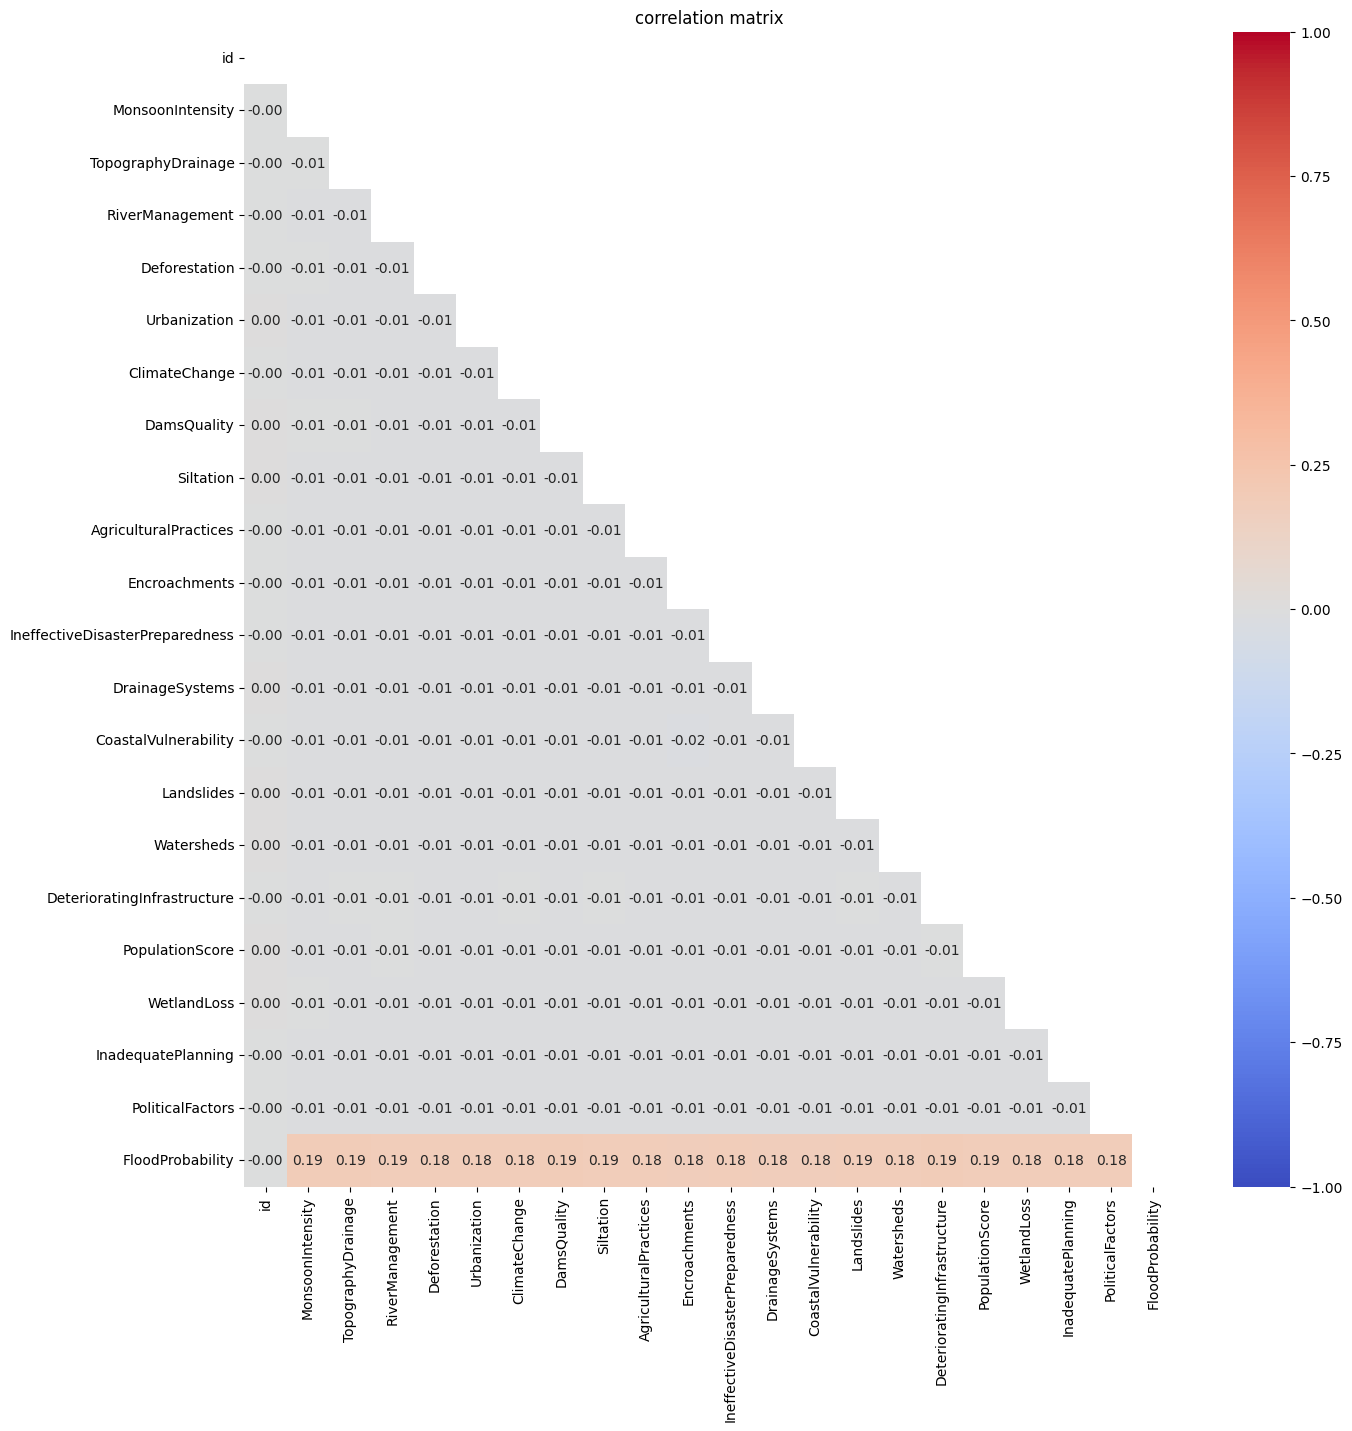

In [36]:
correlation_matrix = train.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype = bool))
# 하삼각을 가리려면 np.tril

plt.figure(figsize = (15, 15))


sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt = ".2f", mask = mask, vmin = -1, vmax = 1)
plt.title("correlation matrix")
plt.show()

# missing value, outlier

In [37]:
# 상자그래프를 통해 이상치 확인

# for columns in train.columns:
#     plt.figure()
#     train.boxplot(column = columns)
#     plt.title(f"Boxplot of {columns}")
#     plt.show()

In [38]:
# IQR방법을 이용하여 데이터 확인

def detect_outlier_iqr(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_boundary = q1 - iqr * 1.5
    upper_boundary = q3 + iqr * 1.5
    return sum((column < lower_boundary) | (column > upper_boundary))

In [39]:
# outliersr_iqr = train.apply(detect_outlier_iqr)
# print(outliersr_iqr)

In [40]:
# z점수를 이용한 이상치 제거

# def detect_outlier_zscore(column):
#     threshold = 3
#     mean = column.mean()
#     std_dev = column.std()
#     zscore = (column - mean) / std_dev
#     return sum(abs(zscore) > threshold)

In [41]:
# outliers_zscore = train.apply(detect_outlier_zscore)
# print(outliers_zscore)

# data divide

In [42]:
train_x = train.drop(columns = ["FloodProbability", "id"])
train_y = train["FloodProbability"]

test_x = test.drop(columns = ['id'])

In [43]:
print(f"{train_x.shape}, {train_x.columns} \n {train_y.shape} \n {test_x.shape}")

(1117957, 20), Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object') 
 (1117957,) 
 (745305, 20)


# PCA

In [44]:
pca_model = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10))
])

train_x_pca = pca_model.fit_transform(train_x)
test_x_pca = pca_model.fit_transform(test_x)

In [45]:
print(f"{train_x.shape}, {test_x.shape}, {train_x_pca.shape}, {test_x_pca.shape}")

(1117957, 20), (745305, 20), (1117957, 10), (745305, 10)


# 최종 데이터 완성
- train_x
- train_x_pca
- train_y

- test_x
- test_x_pca

# Modeling

- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine

# import library

In [46]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

In [47]:
x_train, x_val, y_train, y_val = train_test_split(train_x, train_y, test_size = 0.2, random_state = 2024)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(894365, 20) (223592, 20) (894365,) (223592,)


In [48]:
LR = LinearRegression()
LR.fit(x_train, y_train)

y_pred = LR.predict(x_val)

In [49]:
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"MSE: {mse}, R2 score: {r2}")

MSE: 0.0004048275251603356, R2 score: 0.8446404968063548


In [50]:
y_test_pred = LR.predict(test_x)
result_df = pd.DataFrame({'id':test['id'], 'FloodProbability':y_test_pred})
result_df

,id,FloodProbability
0,1117957,0.573534
1,1117958,0.455177
2,1117959,0.454708
3,1117960,0.466153
4,1117961,0.466086
...,...,...
745300,1863257,0.477208
745301,1863258,0.449357
745302,1863259,0.624274
745303,1863260,0.550930


In [51]:
result_df.to_csv("../result/submission.csv", index = False)

# pca 적용한 결과

In [52]:
x_train_pca, x_val_pca, y_train_pca, y_val_pca = train_test_split(train_x_pca, train_y, test_size = 0.2, random_state = 2024)
print(x_train_pca.shape, x_val_pca.shape, y_train_pca.shape, y_val_pca.shape)

(894365, 10) (223592, 10) (894365,) (223592,)


In [53]:
LR = LinearRegression()
LR.fit(x_train_pca, y_train_pca)

y_pred_pca = LR.predict(x_val_pca)

In [54]:
mse_pca = mean_squared_error(y_val_pca, y_pred_pca)
r2_pca = r2_score(y_val_pca, y_pred_pca)

print(f"MSE: {mse_pca}, R2 score: {r2_pca}")

MSE: 0.0025922154877669797, R2 score: 0.005192865305174488


In [55]:
y_test_pred_pca = LR.predict(test_x_pca)
result_df_pca = pd.DataFrame({'id':test['id'], 'FloodProbability':y_test_pred})
result_df_pca

,id,FloodProbability
0,1117957,0.573534
1,1117958,0.455177
2,1117959,0.454708
3,1117960,0.466153
4,1117961,0.466086
...,...,...
745300,1863257,0.477208
745301,1863258,0.449357
745302,1863259,0.624274
745303,1863260,0.550930


In [56]:
result_df_pca.to_csv("../result/submission_pca.csv", index = False)